# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты:
1. Описание данных *(с расчетом базовых статистик)*,
2. Исследование зависимостей и формулирование гипотез,
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей,
4. Сравнение качества полученных моделей.

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация.
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [88]:
# import libbraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path

PATH = path.abspath('data\\telecom_users.csv')
full_data = pd.read_csv(PATH,  sep=',', index_col=0).sort_index()
full_data['TotalCharges'] = np.where((full_data['TotalCharges']) == ' ', 
                                     pd.NA, full_data['TotalCharges'])#change emptiness how NA
full_data = full_data.dropna()

full_data['gender'] = np.where(full_data['gender'] == 'Female', 1, 0)#replace how: Male - 0; Female - 1


for col in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:#replace how: No - 0; Yes - 1
    full_data[col] = np.where(full_data[col] == 'Yes', 1, 0)
    

for i, val in enumerate(['No phone service', 'No', 'Yes']):#replace how: No phone service - 0; No - 1; Yes - 2
    full_data['MultipleLines'] = np.where(full_data['MultipleLines'] == val, i, full_data['MultipleLines'])
    

for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']:
    for i, val in enumerate(['No internet service', 'No', 'Yes']):#replace how: No internet service - 0; No - 1; Yes - 2
        full_data[col] = np.where(full_data[col] == val, i, full_data[col])


for i, val in enumerate(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'
]):#replace how: Electronic check - 0; Mailed check - 1; Bank transfer (automatic) - 2; Credit card (automatic) - 3
    full_data['PaymentMethod'] = np.where(full_data['PaymentMethod'] == val, i, full_data['PaymentMethod'])
    
for i, val in enumerate([
   'Month-to-month', 'One year', 'Two year'
]):#replace how: Month-to-month - 0; One year - 1; Two year - 2
    full_data['Contract'] = np.where(full_data['Contract'] == val, i, full_data['Contract'])

for i, val in enumerate([
    'No', 'DSL', 'Fiber optic'
]):#replace how: No - 0; DSL - 1; Fiber optic - 2
    full_data['InternetService'] = np.where(full_data['InternetService'] == val, i, full_data['InternetService'])

done_data = full_data.loc[:, full_data.columns.drop('customerID')]#create DF for work with him with out User ID


print('full_data')
full_data.head(10)

full_data


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,1,...,1,1,1,1,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,1,1,2,...,2,1,1,1,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,1,1,2,...,1,1,1,1,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,2,...,2,2,1,1,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,1,2,1,...,1,1,1,1,0,1,0,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,2,2,1,...,2,1,2,2,0,1,0,99.65,820.5,1
6,1452-KIOVK,0,0,0,1,22,1,2,2,1,...,1,1,2,1,0,1,3,89.10,1949.4,0
7,6713-OKOMC,1,0,0,0,10,0,0,1,2,...,1,1,1,1,0,0,1,29.75,301.9,0
9,6388-TABGU,0,0,0,1,62,1,1,1,2,...,1,1,1,1,1,0,2,56.15,3487.95,0
10,9763-GRSKD,0,0,1,1,13,1,1,1,2,...,1,1,1,1,0,1,1,49.95,587.45,0


In [89]:
print('done_data: ')

for col in done_data.columns:#change numeric type for DF columns
    done_data[col] = pd.to_numeric(done_data[col])
    
done_data.head(10)

done_data: 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,1,2,1,1,1,1,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,1,1,2,1,2,1,1,1,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,2,2,1,1,1,1,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,2,1,2,2,1,1,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,1,2,1,1,1,1,1,1,0,1,0,70.70,151.65,1
5,1,0,0,0,8,1,2,2,1,1,2,1,2,2,0,1,0,99.65,820.50,1
6,0,0,0,1,22,1,2,2,1,2,1,1,2,1,0,1,3,89.10,1949.40,0
7,1,0,0,0,10,0,0,1,2,1,1,1,1,1,0,0,1,29.75,301.90,0
9,0,0,0,1,62,1,1,1,2,2,1,1,1,1,1,0,2,56.15,3487.95,0
10,0,0,1,1,13,1,1,1,2,1,1,1,1,1,0,1,1,49.95,587.45,0


In [90]:
visualization_data = full_data
visualization_data['Advantageous'] = np.where(visualization_data['MonthlyCharges']>75, 1, 0)

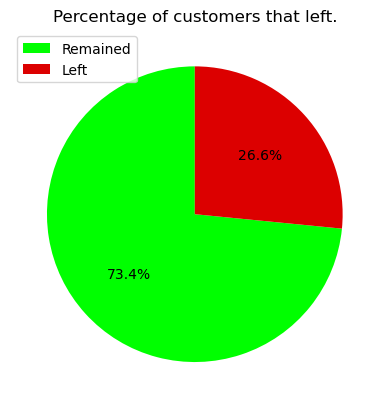

In [91]:
visualization_data['Churn'].count()
visualization_data['Churn'].sum()
plt.title('Percentage of customers that left.')
plt.pie(visualization_data['Churn'].value_counts(),
       colors=['#00FF00', '#DC0000'], autopct=lambda x: str(round(x, 1))+'%', startangle=90)
plt.legend(['Remained', 'Left'])
plt.show()

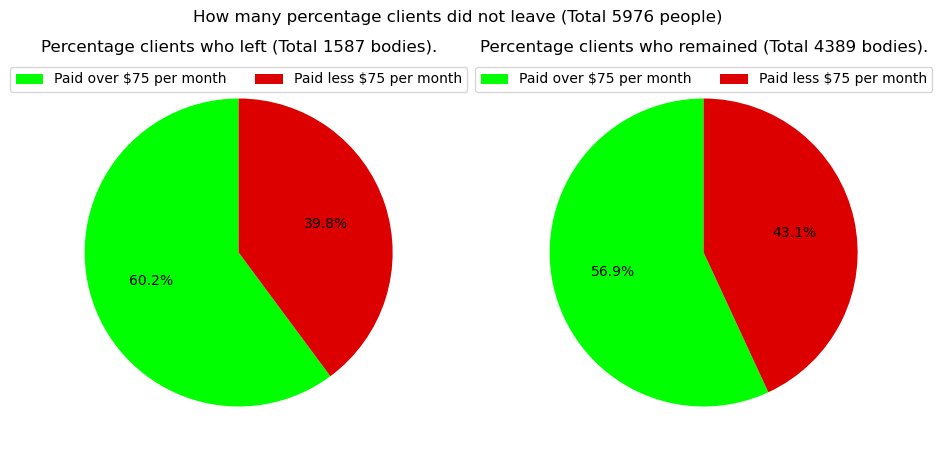

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
fig.suptitle('How many percentage clients did not leave (Total '+str(visualization_data.shape[0])+' people)')


churn_dict = {'1':visualization_data[(visualization_data['Churn']==1)].loc[:, 'Advantageous'].value_counts(),
            '0':visualization_data[(visualization_data['Churn']==0)].loc[:, 'Advantageous'].value_counts()
             }


axes[0].pie(churn_dict['0'], colors=['#00FF00', '#DC0000'],
           autopct=lambda x: str(round(x, 1))+'%', startangle=90)
axes[0].legend(['Paid over $75 per month', 'Paid less $75 per month'], loc=9, ncols=2)
axes[0].set_title('Percentage clients who left (Total '+
                  str(visualization_data[(visualization_data['Churn']==1)].loc[:, 'Advantageous'].count())+' bodies).')

axes[1].pie(churn_dict['1'], colors=['#00FF00', '#DC0000'],
           autopct=lambda x: str(round(x, 1))+'%', startangle=90)
axes[1].legend(['Paid over $75 per month', 'Paid less $75 per month'], loc=9, ncols=2)
axes[1].set_title('Percentage clients who remained (Total '+
                  str(visualization_data[(visualization_data['Churn']==0)].loc[:, 'Advantageous'].count())+' bodies).')

plt.show()

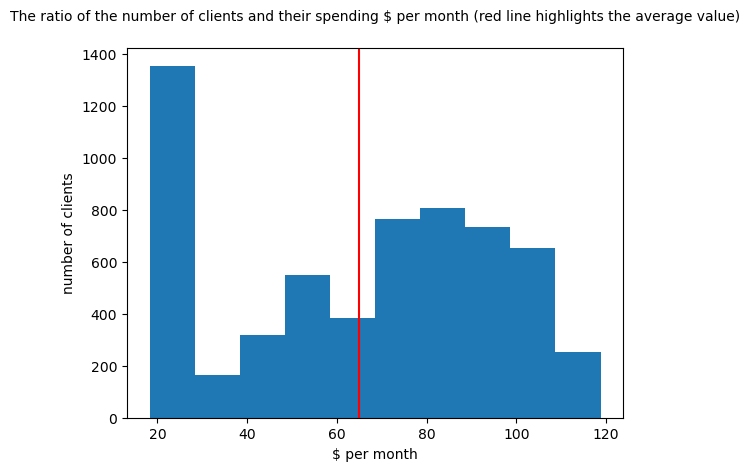

In [93]:
plt.hist(visualization_data['MonthlyCharges'])
plt.axvline(visualization_data['MonthlyCharges'].mean(),c='red')
plt.xlabel('$ per month')
plt.ylabel('number of clients')
plt.title('The ratio of the number of clients and their spending $ per month (red line highlights the average value)', pad=20,
         fontsize=10)
plt.show()

**The data is not balanced, most of the customers remained.**

In [94]:
#The ratio of remaining customers to those who left
rat = len(full_data.loc[full_data['Churn']==0])/len(full_data.loc[full_data['Churn']==1])
rat

2.765595463137996

In [95]:
# Balancing the data by copying the smallest class
df_temp = full_data.loc[full_data['Churn']==1]
df_temp = df_temp.loc[df_temp.index.repeat(rat)]
full_data = pd.concat([full_data.loc[full_data['Churn']==0], df_temp]).sample(frac=1)
full_data.loc[:,'Churn'].value_counts()

0    4389
1    3174
Name: Churn, dtype: int64

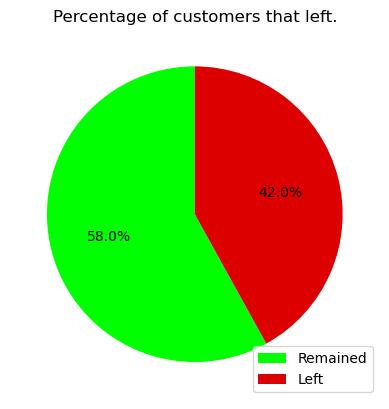

In [96]:
visualization_data = full_data
visualization_data['Advantageous'] = np.where(visualization_data['MonthlyCharges']>75, 1, 0)


visualization_data['Churn'].count()
visualization_data['Churn'].sum()
plt.title('Percentage of customers that left.')
plt.pie(visualization_data['Churn'].value_counts(),
       colors=['#00FF00', '#DC0000'], autopct=lambda x: str(round(x, 1))+'%', startangle=90)
plt.legend(['Remained', 'Left'])
plt.show()

In [97]:
#Attitude after balancing
rat = len(full_data.loc[full_data['Churn']==0])/len(full_data.loc[full_data['Churn']==1])
rat

1.382797731568998

# 2. Исследование зависимостей и формулирование гипотез

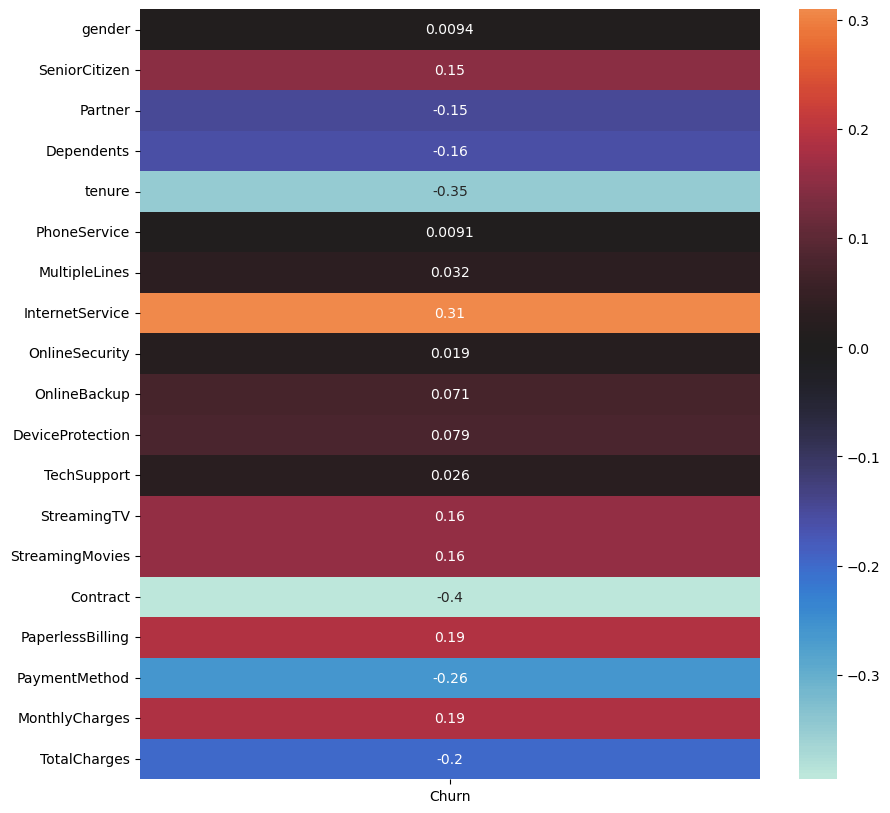

Dependence Churn more absolute 0.1 has: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [98]:
df_cor = done_data.corr()
df_cor = pd.DataFrame(df_cor.loc['Churn', df_cor.columns.drop('Churn')])
plt.figure(figsize=(10, 10))
sns.heatmap(df_cor, center=0, annot=True)#Chaddoсk heatmap
plt.show()

#columns where dependence Churn more absolute 0.1
addiction_list = ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

print('Dependence Churn more absolute 0.1 has:', addiction_list)

Based on this dependence, we can form a hypothesis that the client will stay or leave depends on the parameters (**addiction_list**):
<br>['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
<br>All these parameters affect the solution by more than **10%**.

In [99]:
target_df = done_data.loc[:, 'Churn']#create target DF
featured_df = done_data.loc[:, addiction_list]#create featured DF

# 3. Построение моделей для прогнозирования оттока

In [100]:
#import libraries and class for stacking
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, mean_absolute_error, precision_recall_fscore_support


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



def score(model_predict, y_test, status=False, model_train_predict=None, y_train=None):
    """
    score - function which return metrics
    """
    Ascore = accuracy_score(y_test, model_predict)
    r2_score = roc_auc_score(y_test, model_predict)
    precision_score, recall_score, f1_score, _ = precision_recall_fscore_support(y_test, model_predict, average='macro')
    MSE_test = mean_absolute_error(y_test, model_predict)
    if status:
        try:
            MSE_train = mean_absolute_error(y_train, model_train_predict)
            return {
        'Ascore': round(Ascore, 5),
        'MSE_test': round(MSE_test, 5),
        'MSE_train': round(MSE_train, 5),
        'r2_score': round(r2_score, 5),
        'recall': round(recall_score, 5),
        'precision': round(precision_score, 5),
        'f1':round(f1_score, 5)
        }
        
        except:
            raise ValueError('model_train_predict or y_train not definded')
    elif model_train_predict != None or y_train != None:
        raise ValueError('status not definded')
    return {
        'Ascore': round(Ascore, 5),
        'MSE_test': round(MSE_test, 5),
        'r2_score': round(r2_score, 5),
        'recall': round(recall_score, 5),
        'precision': round(precision_score, 5),
        'f1':round(f1_score, 5)
        }
#create train and test data
X_train, X_test, y_train, y_test = train_test_split(featured_df, target_df,
                                                    test_size=0.2, random_state=42)

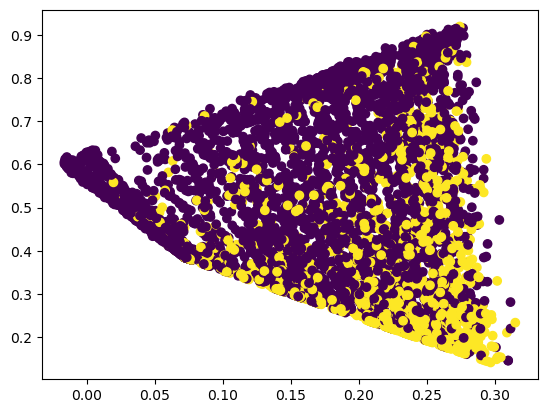

In [101]:
#Bosting data
pca=PCA(n_components=2, random_state=42).fit(done_data.loc[:, addiction_list])
X_trans = pca.transform(done_data.loc[:, addiction_list])
X_new = pca.inverse_transform(X_trans)

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, done_data.loc[:, 'Churn'],
                                                                    random_state=42, test_size=0.2)

plt.scatter(X_new[:, 0], X_new[:, 1], c=done_data.loc[:, 'Churn'])

Based on this graph, we can say that we are not faced with a clustering task, but based on the required result, we determine that this is a ***classification task.***

In [102]:
%%time
#search parametrs  for model
RandomForestClassifier_params = {#parametrs RandomForestClassifier
    'n_estimators': range(10, 100, 10),
    'min_samples_leaf': range(1, 5),
    'random_state': [42]
}

skf = StratifiedKFold(random_state=42, n_splits=4, shuffle=True)


#search best parametrs for models
best_params = GridSearchCV(estimator=RandomForestClassifier(),
                                            param_grid=RandomForestClassifier_params, cv=skf
                                            ).fit(X_train, y_train).best_params_
RandomForestClassifier_params = best_params
print('RandomForestClassifier_params searched')

RandomForestClassifier_params searched
CPU times: total: 22.1 s
Wall time: 22.2 s


In [103]:
%%time
#learn models, request predict on train and test date's, request metrics from scroe function

RandomForestClassifier_model = RandomForestClassifier(**RandomForestClassifier_params).fit(X_train, y_train)
RandomForestClassifier_predict = RandomForestClassifier_model.predict(X_test)
RandomForestClassifier_predict_train = RandomForestClassifier_model.predict(X_train)
RandomForestClassifier_accuracy = score(model_predict=RandomForestClassifier_predict, y_test=y_test, status=True,
                                        model_train_predict=RandomForestClassifier_predict_train, y_train=y_train)

CPU times: total: 281 ms
Wall time: 281 ms


In [125]:
%%time
#search parametrs  for model
LogisticRegression_params = {#parametrs LogisticRegression
    'C': np.arange(0.5, 1, 0.1),
    'random_state': [42],
    'max_iter':[1000]
}



best_params = GridSearchCV(estimator=LogisticRegression(),
                                        param_grid=LogisticRegression_params, cv=skf
                                        ).fit(X_train, y_train).best_params_
LogisticRegression_params = best_params
print('LogisticRegression_params searched')
LogisticRegression_params

LogisticRegression_params searched
CPU times: total: 500 ms
Wall time: 508 ms


{'C': 0.8999999999999999, 'max_iter': 1000, 'random_state': 42}

In [126]:
%%time
#learn models, request predict on train and test date's, request metrics from scroe function
LogisticRegression_model = LogisticRegression(**LogisticRegression_params).fit(X_train, y_train)
LogisticRegression_predict = LogisticRegression_model.predict(X_test)
LogisticRegression_predict_train = LogisticRegression_model.predict(X_train)
LogisticRegression_accuracy = score(model_predict=LogisticRegression_predict, y_test=y_test, status=True,
                                    model_train_predict=LogisticRegression_predict_train, y_train=y_train)

CPU times: total: 31.2 ms
Wall time: 29 ms


In [127]:
#show info about models
models = {
    'LogisticRegression_model':{
        'params':LogisticRegression_params,
        'score':LogisticRegression_accuracy
    },
    'RandomForestClassifier_model':{
        'params':RandomForestClassifier_params,
        'score':RandomForestClassifier_accuracy
    }
}


for model in models.keys():
    print('{model}: \nparams: {params}\nscore: {score}\n'.format(
        model=model, params=models[model]['params'], score=models[model]['score']
            )
        )

LogisticRegression_model: 
params: {'C': 0.8999999999999999, 'max_iter': 1000, 'random_state': 42}
score: {'Ascore': 0.81355, 'MSE_test': 0.18645, 'MSE_train': 0.20293, 'r2_score': 0.73123, 'recall': 0.73123, 'precision': 0.75567, 'f1': 0.74163}

RandomForestClassifier_model: 
params: {'min_samples_leaf': 4, 'n_estimators': 70, 'random_state': 42}
score: {'Ascore': 0.80351, 'MSE_test': 0.19649, 'MSE_train': 0.12259, 'r2_score': 0.70379, 'recall': 0.70379, 'precision': 0.74339, 'f1': 0.71859}



# 4. Сравнение качества моделей

In [128]:
#search for the best model by 3 or more best parameters
score_keys = ['Ascore', 'r2_score', 'recall', 'precision', 'f1']


best_model = 0

for model in models.keys():
    if best_model == 0:
        best_model = [model, models[model]['score']]
    else:
        superior_params =  0
        for metrics_score in score_keys:
            if best_model[1][metrics_score] < models[model]['score'][metrics_score]:
                superior_params += 1
        if superior_params>= 3:
            best_model = [model, models[model]['score']]
best_model

['LogisticRegression_model',
 {'Ascore': 0.81355,
  'MSE_test': 0.18645,
  'MSE_train': 0.20293,
  'r2_score': 0.73123,
  'recall': 0.73123,
  'precision': 0.75567,
  'f1': 0.74163}]

Logistic Regression the best model for this task

In [129]:
%%time
#check if logistic regression readings improve on compressed data
LogisticRegression_boost_params = {#parametrs LogisticRegression
    'C': np.arange(0.5, 1, 0.1),
    'random_state': [42]
}


skf = StratifiedKFold(random_state=42, n_splits=4, shuffle=True)


best_params = GridSearchCV(estimator=LogisticRegression(),
                                        param_grid=LogisticRegression_boost_params, cv=skf
                                        ).fit(X_new_train, y_new_train).best_params_
LogisticRegression_boost_params = best_params
print('LogisticRegression_boost_params searched')

LogisticRegression_boost_model = LogisticRegression(**LogisticRegression_boost_params).fit(X_new_train, y_new_train)
LogisticRegression_boost_predict = LogisticRegression_boost_model.predict(X_new_test)
LogisticRegression_boost_predict_train = LogisticRegression_boost_model.predict(X_new_train)
LogisticRegression_boost_accuracy = score(model_predict=LogisticRegression_boost_predict, y_test=y_new_test, status=True,
                                          model_train_predict=LogisticRegression_boost_predict_train, y_train=y_new_train)
print(LogisticRegression_boost_accuracy)

for metrics_score in score_keys:
    if best_model[1][metrics_score] < LogisticRegression_boost_accuracy[metrics_score]:
        superior_params += 1
if superior_params>=3:
    print('\nAfter boosting the model got better\n')
else:
    print('\nAfter boosting the model has not changed or has become worse\n')

LogisticRegression_boost_params searched
{'Ascore': 0.78763, 'MSE_test': 0.21237, 'MSE_train': 0.21925, 'r2_score': 0.67789, 'recall': 0.67789, 'precision': 0.71883, 'f1': 0.69217}

After boosting the model has not changed or has become worse

CPU times: total: 156 ms
Wall time: 154 ms
